# Prex

# Subject: Measuring distances via ultrasonic sensor for Reinforcement Learning Application on rover robot based on ROS2.

# Author: Giuseppe Ferraro





# Theoretical section:

## 0. Using an ultrasonic sensor to measure distances.

<b> The goal of this prex is to use an ultrasonic sensor for measuring distances.</b> We will distinguish between direct and indirect measures. We will analyze the specs and documentation of the sensor. We will try to improve its performance using a sencond sensor, specifically a thermic cell. Later, We will propose a method to validate their quality and complience to the constructors' specifications. As bonus parts, we will try to use these sensors for piloting a robot using a Reinforcement Learning approach. For this, we will use the DQN algorithm. Initially, the students will train the robot over in a simulator and, secondly, they will deploy their agent in real scenario.

## 0.1 What's a measure?

Taking a measure it means to discover the exact size and amount of something. We distinguish between <b>direct measures</b> and <b> indirect measures</b>

## 0.2 What's a measuring instrument?

 A measuring instrument is a tool that allows to quantify a certain dimension or amount of an item.
 
It has 4 main charateristics:
* a <b>precision</b>: this is an index of the quality of the instrument. Taking tha same measure should give results close to eachothers.
* a <b>range</b>: this the interval of measurments that the tool can take.
* a <b>sensitivyt</b>: this is the smallest variation in the quantity that the tool can measure
* a <b>response</b>: this is the pace at wich the tool can produce a measure.



## 0.3 Direct and Indirect meausures.

There are 2 types of measurements. 

### Direct Measures: 
These are all the measure that we obtain by comparing the given quantity with a reference unit of measure. For instance the lenght of something can be measured with a ruler.

### Indirect Measures:
These are all the measure that we obtain by computing some mathematical computation of other physical dimensions. For example, the temperature. We can't measure directly the temperature of an object, but thanks to the thermical equilibrium law of the bodies and to the fact the heat tends to dilatate the dimensions, we can measure the tempertature with a mercury thermometer. Ineed, we convert the elongation of the metal inside the glass bulb in a certain amount of degrees Celsius or Farenheit.

It is important to know that the same dimesion can be measured in both ways. For example a distance, we can use a ruler (<b>direct m.</b>) or an ultrasonic sensor (<b>indirect m.</b>).


## 0.4 How can we measure distances through sound's physics law?

As already mentioned, we ca use the indirect measure of the sound's speed to meausre a distance.

Simplifying, we can say that the speed of sound it's very susceptible to the material of its medium and to the temperature of that material. In the case of the air we can compute the speed of the sound in m/s using the following formula:
    V = 331.4 +0.6T    (1)
where T is the temperature measured in Celsius degrees.
This formula tells us that the sound's speed augument of 0.6 m/s per each Celsius degree.

In order to take an indirect measure of a distance from an object we could:
1. produce a sound and simultaneusly starting a stopwatch
2. waiting for its echo and simultaneusly stopping a stopwatch
The time interval t we have obtained tells us how long the wave sound has travel from us to the object and come back. 

We can now compute the product V*t for obtaining a distance but we need to keep in mind that this distance is for the roundtrip of the acoustic wave, so we must divide by 2 for obtaining the desired distance from the starting position of the wave and the item that reflected the sound.

## 1. What's an ultrasonic sensor?

<img src="HC-SR04 Ultrasonic Sensor Module Distance Measuring Transducer-min.jpg" width=500>

According to the frequencies measured in Hz, we distinguish the sound in:
* infrasound:  0 Hz - 20 Hz
* audible sound:  20 Hz - 20 kHz 
* ultrasound:  > 20 kHz 


An ultrasonic sensor is a sonar that use sounds above the 20kHz to determine the distance to an object.

In this course will use HCSR04 sensor: <a href="HC-SR04 User Manual.pdf"> documentation </a>



### Ultrasonic HCSR04 Sensor Library and ROS 2 Wrapper : https://github.com/mataruzz/libHCSR04

## 1.1 How does it work?

It all starts when the trigger pin is set HIGH for 10µs. In response, the sensor transmits an ultrasonic burst of eight pulses at 40 kHz. This 8-pulse pattern is specially designed so that the receiver can distinguish the transmitted pulses from ambient ultrasonic noise.

These eight ultrasonic pulses travel through the air away from the transmitter. Meanwhile the echo pin goes HIGH to initiate the echo-back signal.

If those pulses are not reflected back, the echo signal times out and goes low after 38ms (38 milliseconds). Thus a pulse of 38ms indicates no obstruction within the range of the sensor.

<img src="https://lastminuteengineers.com/wp-content/uploads/arduino/HC-SR04-Ultrasonic-Sensor-Working-Echo-when-no-Obstacle.gif" alter="no obstacle">


If those pulses are reflected back, the echo pin goes low as soon as the signal is received. This generates a pulse on the echo pin whose width varies from 150 µs to 25 ms depending on the time taken to receive the signal.

<img src="https://lastminuteengineers.com/wp-content/uploads/arduino/HC-SR04-Ultrasonic-Sensor-Working-Echo-reflected-from-Obstacle.gif" alter="with obstacle">

So we obtain the time t for the roundtrip. 

## 1.2 How can we improve its reliability?
### Hint: taking in account the Temperature.

Adding an extra sensor for measuring the temperature can help us to be more accurate in computation of the distance.

In this course we will use this sensor: ...

## 2. How to validate a sensor?

Normally, a constructor has alredy some process and techniques that assure the compliance of its products to some specification, but once in while it can happen that we end up with a poor sensor that does not comply with the construction charatteristics and performance.

A valid technique to check if the sensor is complying with the constructor's specs is to use the <b>Hypothesis Testing</b>.

### 2.1 Hypothesis Testing

It is a formal procedure that allow us to reject or not an Hypotesis.

It works like that:
1. we have to state an hypotesis that we want to prove named null hypothesis indicated with H0 and its altenative hypothesis, indicated with H1
2. collect the data (the more the better)
3. fix a level of significance (usually 5%)
4. perform the statical test using Z-score (#samples >30)
5. decide wether to reject or fail the null hypothesis


### How to formulate the Null Hyposesis H0 and its alternative H1?
To formulate the null Hypothesis, we have to define it as something that we want to be false, so if we think that men are, on average, taller than women we could formulate:

    H0: men are NOT taller, on overage, than women. 

and consequently,

    H1:men are, on averagem taller than women.

If performing the statiscal test we conclude rejecting the Null hypothesis, we have proved that H0 is false, thus, the conclusion is that men are taller on average than women.

### What's Z-score?
Even if we do not know the population standard deviation for our measures, it is sufficient to have more than 30 samples for using the Z-test instead to t-test.

Z-score is a statistical measure that quantifies the distance between a data point and the mean of a dataset. It's expressed in terms of standard deviations. It indicates how many standard deviations a data point is from the mean of the distribution.


If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean. Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.

The formula:

    z = ( x - μ ) / (σ/sqrt(n))

Where:

    z = Z-score
    x = the value being evaluated
    μ = the mean
    σ = the standard deviation
    n = number of samples

### How to perform the statistical test for our case?
1. calculate the mean of our data and its standard deviation.
2. compute the Z-score 
3. use a one sample Z Test Hypothesis
4. fix the level of significance at 5%
5. choose between One-Tailed or Two-tailed value
6. compare the Z-score with the critical value to reject or not H0. For istance, if we are in the one-tailed case, H0: u > u0 and the Z-score is greater than critical value we can reject H0.

critical value(s):
<img src="critical_values.png"  width = 500 alter="table of critical values">




## 3. What's ROS2?

<img src="https://static.wixstatic.com/media/c5849b_99ba8604243549ceaef7eef8534735d8~mv2.png/v1/fill/w_699,h_699,al_c/c5849b_99ba8604243549ceaef7eef8534735d8~mv2.png" width =200 alter="ros2 image">

The Robot Operating System (ROS) is a set of software libraries and tools for building robot applications. From drivers and state-of-the-art algorithms to powerful developer tools, ROS has the open source tools you need for your next robotics project.

Since ROS was started in 2007, a lot has changed in the robotics and ROS community. The goal of the ROS 2 project is to adapt to these changes, leveraging what is great about ROS 1 and improving what isn’t.

<a href="https://docs.ros.org/en/foxy/Installation.html"> Installation ROS2</a>

<a href="https://www.youtube.com/playlist?list=PLLSegLrePWgJudpPUof4-nVFHGkB62Izy"> A youtube tutorial on ROS2</a>

<a href="https://www.theconstruct.ai/wp-content/uploads/2021/10/ROS2-Command-Cheat-Sheets-updated.pdf"> ROS2 Cheat Sheets</a>

1. <a href="https://docs.ros.org/en/foxy/Tutorials/Beginner-CLI-Tools/Configuring-ROS2-Environment.html"> Configuring the environment </a>


#### Key concepts:
- Nodes
- Topics
- Services
- Parameters
- Actions


## Graphical Tools:

To see general GUI: 
`rqt`

To see the graph of nodes: 
`rqt_graph`

## How to start a node:
To launch an executable from a package
`ros2 run <package_name> <executable_name>`

## Remapping:
Remapping allows you to reassign default node properties, like node name, topic names, service names, etc., to custom values.

In case of different object to be controlled from another node, a remapping of the topics is needed, as for example in the case of two turtle in turtlesim:

`ros2 run turtlesim turtle_teleop_key --ros-args --remap turtle1/cmd_vel:=turtle2/cmd_vel`

## Workspace
ROS 2 relies on the notion of combining workspaces using the shell environment. “Workspace” is a ROS term for the location on your system where you’re developing with ROS 2. The core ROS 2 workspace is called the underlay. Subsequent local workspaces are called overlays. When developing with ROS 2, you will typically have several workspaces active concurrently.

## Nodes:
A node is a fundamental ROS 2 element that serves a single, modular purpose in a robotics system.
<br>It can have 0...N <b>Publisher</b> and/or 0...N <b>Subscriber</b> 0...N <b>Service</b> and/or 0...N <b>Action</b>.
<img src="https://docs.ros.org/en/foxy/_images/Topic-SinglePublisherandSingleSubscriber.gif">

### How to get node list:
`ros2 node list`

### How to get node's infos:
The following command returns a list of subscribers, publishers, services, and actions. i.e. the ROS graph connections that interact with that node.
`ros2 node info <node_name>`

## Topics:
ROS 2 breaks complex systems down into many modular nodes. Topics are a vital element of the ROS graph that act as a <b>bus</b> for nodes to exchange messages.<br>
<br>The <b>multiplicity</b> of topic can be:
- <b>1-to-1</b>,
- <b>1-to-many</b>,
- <b>many-to-one</b>,
- <b>many-to-many</b>

<img src="https://docs.ros.org/en/foxy/_images/Topic-MultiplePublisherandMultipleSubscriber.gif">

Topics are one of the main ways in which data is moved between nodes and therefore between different parts of the system.

### How to get topics list:
`ros2 topic list`

As above but it adds the topic type in brackets: 
`ros2 topic list -t`

### How to see topics'output:
To read data beeing published on a topic, use:
`ros2 topic echo <topic_name>`

### How to push data on a topic:
To push data on a topic, use:
`ros2 topic pub <topic_name> <msg_type> '<args>'`
The '<args>' argument is the actual data you’ll pass to the topic, in the structure you just discovered in the previous section. It’s important to note that this argument needs to be input in YAML syntax. Do it:

#### - using --once to publish one message and then exit:<br>
`ros2 topic pub --once /turtle1/cmd_vel geometry_msgs/msg/Twist "{linear: {x: 2.0, y: 0.0, z: 0.0}, angular: {x: 0.0, y: 0.0, z: 1.8}}"`

#### - using --rate <number_of_Heartz> to keep publishing at frequency defined:<br>
`ros2 topic pub --rate 1 /turtle1/cmd_vel geometry_msgs/msg/Twist "{linear: {x: 2.0, y: 0.0, z: 0.0}, angular: {x: 0.0, y: 0.0, z: 1.8}}"`

## Services:
Services are another method of communication for nodes in the ROS graph. Services are based on a call-and-response model versus the publisher-subscriber model of topics. While topics allow nodes to subscribe to data streams and get continual updates, services only provide data when they are specifically called by a client.

<img src="https://docs.ros.org/en/foxy/_images/Service-MultipleServiceClient.gif">

Services have types that describe how the request and response data of a service is structured. Service types are defined similarly to topic types, except service types have two parts: one message for the request and another for the response.

### How to get service type:
`ros2 service type <service_name>`

### How to call a service:
`ros2 service call <service_name> <service_type> <arguments>`<br>
The <arguments> part is optional. For example, you know that Empty typed services don’t have any arguments.
    
### Hot to get the servises list:
`ros2 service list`
    
As above but it adds the service's type in brackets: 
`ros2 service list -t`
    
### Hot to find all the services of a specific type:
`ros2 service find <type_name>`

### Remember:   
Nodes can communicate using services in ROS 2. Unlike a topic - a one way communication pattern where a node publishes information that can be consumed by one or more subscribers - a service is a request/response pattern where a client makes a request to a node providing the service and the service processes the request and generates a response.

You generally don’t want to use a service for continuous calls; topics or even actions would be better suited.
    


## Paramenters:
A parameter is a configuration value of a node. You can think of parameters as node settings. A node can store parameters as integers, floats, booleans, strings, and lists. In ROS 2, each node maintains its own parameters.


### How to get parameters' list
`ros2 param list`

### Hot to get a parameter
To determine a parameter’s type, you can use: `ros2 param get` <br>
To display the type and the current value: `ros2 param get <node_name> <parameter_name>`<br>

### How to set a parameter
To set the the parameter's value: `ros2 param set <node_name> <parameter_name> <value>`<br>

Setting parameters with the set command will only change them in your current session, not permanently.

### How to write all parameters in .yaml
You can save all of a node’s current parameter values into a file (.yaml) to save them for later by using the command: `ros2 param dump <node_name>`

### How to read all parameters from .yaml
To load .yaml fil: `ros2 param load <node_name> <parameter_file>`

To start the same node using your saved parameter values, use: `ros2 run <package_name> <executable_name> --ros-args --params-file <file_name>`


    

## Actions:
Actions are one of the communication types in ROS 2 and are intended for long running tasks. They consist of three parts: a goal, feedback, and a result.

Actions are built on topics and services. Their functionality is similar to services, except actions are <b>preemptable</b> (you can cancel them while executing). They also provide steady feedback, as opposed to services which return a single response.

Actions use a client-server model, similar to the publisher-subscriber model (described in the topics tutorial). An “action client” node sends a goal to an “action server” node that acknowledges the goal and returns a stream of feedback and a result.

<img src="https://docs.ros.org/en/foxy/_images/Action-SingleActionClient.gif">

#### In case of cancellation client side:
The system responds "<action> goal canceled"
    
#### In case of cancellation server side:
The system responds "Aborting goal..."

### How to get action list:
`ros2 action list`

As above, it adds also the action type:<br>
`ros2 action list -t`
    
For a specific node:<br>
`ros2 node info <topic_name>`
    
ROS2 distinguish between <b>Action Client</b> and <b>Action Server</b>.
    
### How to get more information about an action:
#### - to know who uses the specific action:<br>
`ros2 action info /<topic_name>/<action_name>`
#### - to know the structure of an action:<br>
`ros2 action show /<topic_name>/<action_name>`
    
The message as a particular structure that goes like: above the first --- is the structure (data type and name) of the goal request. The next section is the structure of the result. The last section is the structure of the feedback.
    

### How to call a service:
`ros2 service call <service_name> <service_type> <arguments>`<br>
The <arguments> part is optional. For example, you know that Empty typed services don’t have any arguments.
    
### How to send an action goal:
`ros2 action send_goal <action_name> <action_type> <values>`

All goals have a unique ID, shown in the return message.



## Logging:
We can use rqt to log:
`ros2 run rqt_console rqt_console`

### Logger are ordered by severity:
- Fatal
- Error
- Warn
- Info
- Debug

The default level is Info. You will only see messages of the default severity level and more-severe levels.

### Types of log messages:
- Fatal messages indicate the system is going to terminate to try to protect itself from detriment.
- Error messages indicate significant issues that won’t necessarily damage the system, but are preventing it from functioning properly.
- Warn messages indicate unexpected activity or non-ideal results that might represent a deeper issue, but don’t harm functionality outright.
- Info messages indicate event and status updates that serve as a visual verification that the system is running as expected.
- Debug messages detail the entire step-by-step process of the system execution.

## How to set default logger level:
`ros2 run <name_space> <package> <node> --ros-args --log-level WARN`

Setting a specific level will ignore all the lower levels.

## ROS2 BAG
### A way for storing and replaying data
You can record data passed on topics in your ROS 2 system using the ros2 bag command. Whether you’re sharing your work with others or introspecting your own experiments, it’s a great tool to know about.

The command to store a particular topic: ```ros2 bag record <topic_name>```

It is possible to record multiple topic simultaneasly: ```ros2 bag record -o subset <topic1_name> <topic2_name>```

### To replay the bag
```ros2 bag play <name_bag>```

## Using colcon to build packages
A ROS workspace is a directory with a particular structure. Commonly there is a src subdirectory. Inside that subdirectory is where the source code of ROS packages will be located. Typically the directory starts otherwise empty.

colcon does out of source builds. By default it will create the following directories as peers of the <b>src</b> directory:

The <b>build</b> directory will be where intermediate files are stored. For each package a subfolder will be created in which e.g. CMake is being invoked.

The <b>install</b> directory is where each package will be installed to. By default each package will be installed into a separate subdirectory.

The <b>log</b> directory contains various logging information about each colcon invocation.


### Useful arguments for colcon build:

--packages-up-to builds the package you want, plus all its dependencies, but not the whole workspace (saves time)

--symlink-install saves you from having to rebuild every time you tweak python scripts

--event-handlers console_direct+ shows console output while building (can otherwise be found in the log directory)

## Build systems of ROS2
ROS2 has 2 build system:
    -ament_python
    -ament_cmake


# Practical section:

### 1. ROS2 node for using HC-SR04 sensor with a Raspberry Pi5
Use the ros2 node that you find at <a href ="https://github.com/gferraro2019/ultrasonic_sensor">

### 2. Collect data from the nodes using the Bag
    
### 3. Create Panda Dataframe from ros Bag
    
### 4. Perform the statistical test for our case.
        1. calculate the mean of our data and its standard deviation.
        2. compute the Z-score 
        3. use a one sample Z Test Hypothesis
        4. fix the level of significance at 5%
        5. choose between One-Tailed or Two-tailed value
        6. compare the Z-score with the critical value to reject or not H0. For istance, if we are in the one-tailed case, H0: u > u0 and the Z-score is greater than critical value we can reject H0.

critical value(s):
<img src="critical_values.png"  width = 500 alter="table of critical values">


## 4. Collect data

In [1]:
!wich python

/bin/bash: line 1: wich: command not found


In [2]:
import numpy as np
import pandas
import rclpy

In [3]:
!pip install rosbags

In [4]:
from pathlib import Path
from rosbags.highlevel import AnyReader
from rosbags.typesys import Stores, get_typestore
import pandas as pd

# Read data from the Ros bag

# bagpath = Path('/home/dcas/g.ferraro/Desktop/prex/ros2_bags/data')
bagpath = Path('/home/dcas/g.ferraro/Desktop/prex/ros2_bags/multi_measure2/')

# bagpath = Path('/home/dcas/g.ferraro/Desktop/prex/ros2_bags/rosbag2_2024_07_08-12_34_20')


# Create a type store to use if the bag has no message definitions.
typestore = get_typestore(Stores.ROS2_FOXY)

l=[]
# Create reader instance and open for reading.
with AnyReader([bagpath], default_typestore=typestore) as reader:
    connections = [x for x in reader.connections if x.topic == '/chatter']
    for connection, timestamp, rawdata in reader.messages(connections=connections):
        msg = reader.deserialize(rawdata, connection.msgtype)
        l.append(msg.data)

In [5]:
    
# Create DataFrame from bag's data
df = pd.DataFrame({"distances":l})

In [6]:
# Describe Dataframedf.describe()
df.describe()

,distances
count,1514.000000
mean,37.503415
std,14.033763
min,17.635292
25%,27.579346
50%,37.440449
75%,47.666032
max,57.650517


In [7]:
d = {}

In [8]:
lenght = 300
preselected = df[(df["distances"]<=25)][:lenght]
d["17"] = np.squeeze(preselected.astype(float).to_numpy())
preselected = df[(df["distances"]>=25) & (df["distances"]<35)][:lenght]
d["27"] = np.squeeze(preselected.astype(float).to_numpy())
preselected = df[(df["distances"]>=35) & (df["distances"]<45)][:lenght]
d["37"] = np.squeeze(preselected.astype(float).to_numpy())
preselected = df[(df["distances"]>=45) & (df["distances"]<55)][:lenght]
d["47"] = np.squeeze(preselected.astype(float).to_numpy())
preselected = df[(df["distances"]>=55)][:lenght]
d["57"] = np.squeeze(preselected.astype(float).to_numpy())


In [9]:
import  matplotlib.pyplot as plt

In [10]:
df_ = pd.DataFrame(d)

In [11]:
df_.describe()

,17,27,37,47,57
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,17.663893,27.774855,37.543502,47.634728,57.256591
std,0.015202,0.251791,0.191003,0.187752,0.158324
min,17.635292,27.531683,37.378456,47.460464,57.121006
25%,17.653647,27.580147,37.429788,47.508144,57.163910
50%,17.658984,27.597469,37.440449,47.553268,57.184265
75%,17.671539,27.977921,37.531017,47.902260,57.209130
max,17.707754,28.444824,38.265236,48.364372,57.650517


array([[<Axes: title={'center': '17'}>, <Axes: title={'center': '27'}>],
       [<Axes: title={'center': '37'}>, <Axes: title={'center': '47'}>],
       [<Axes: title={'center': '57'}>, <Axes: >]], dtype=object)

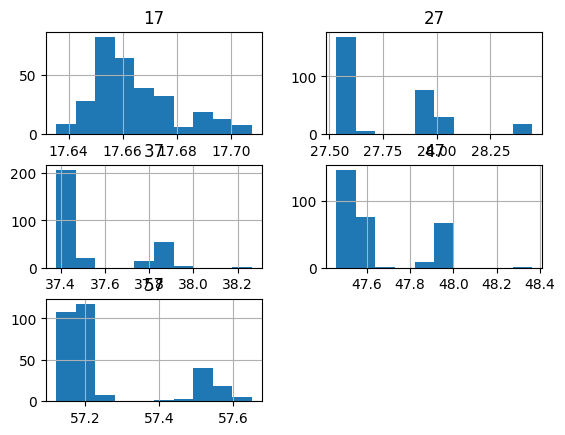

In [12]:
df_.hist()

In [13]:
c = df_-df_.mean()

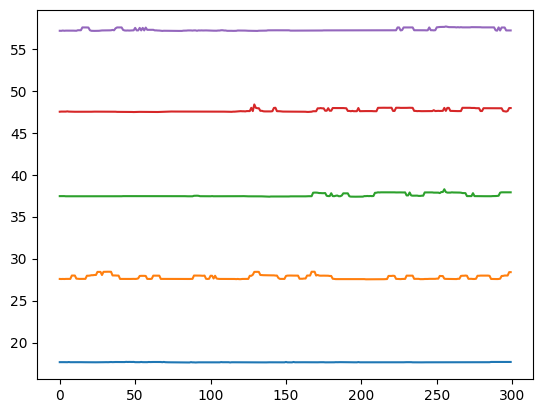

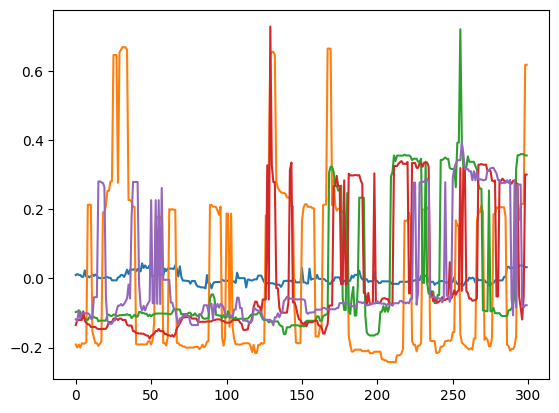

In [14]:
plt.plot(df_)
plt.show()

plt.plot(c)
plt.show()


In [15]:
df_.mean()

17    17.663893
27    27.774855
37    37.543502
47    47.634728
57    57.256591
dtype: float64

In [16]:
# Average of absolute error
absolute_error = df_.mean()-[17,27,37,47,57]
print(absolute_error)
print("Grand average of Absolute Errors:", absolute_error.to_numpy().mean())


17    0.663893
27    0.774855
37    0.543502
47    0.634728
57    0.256591
dtype: float64
Grand average of Absolute Errors: 0.574713713328044


In [17]:
# Average of relative error
relative_error = absolute_error/df_.mean()
print(relative_error)
print("Grand average of Relative Errors::", relative_error.to_numpy().mean())


17    0.037585
27    0.027898
37    0.014477
47    0.013325
57    0.004481
dtype: float64
Grand average of Relative Errors:: 0.01955307189539674


In [18]:
# Average of percentage error
percentage_error = absolute_error/df_.mean() *100
print(percentage_error)
print("Grand average of Percentage Errors::", percentage_error.to_numpy().mean())


17    3.758472
27    2.789772
37    1.447658
47    1.332491
57    0.448142
dtype: float64
Grand average of Percentage Errors:: 1.955307189539674


In [19]:
# Standard deviations
df_.std()

17    0.015202
27    0.251791
37    0.191003
47    0.187752
57    0.158324
dtype: float64

In [20]:
# Average of standard deviations
df_.std().to_numpy().sum()/df_.mean().to_numpy().shape[0]

np.float64(0.16081463046016892)

Given the fact that the average of the absolute error is

<img src="critical_values.png"  width = 500 alter="table of critical values">

In [21]:
# Compute Z-score
z_score = (df_.mean()-[17,27,37,47,57])/df_.std()
print(z_score)

# We consider the 1-side Test, H0: u>u0, if significance is fixed at 5%,  if z_score > 1.650 we can reject H0

17    43.670349
27     3.077376
37     2.845507
47     3.380666
57     1.620668
dtype: float64


# Bonus sections

## 5. What's RL?

Reinforcement learning is a computational approach to understanding and automating goal-directed learning and decision-making. It is distinguished from
other computational approaches by its emphasis on learning by an agent from direct interaction with its environment, without relying on exemplary supervision or complete models of the environment.

We are use to model a reinforcement learning proble as a Markov Decision Problem. We do this because we these kind of problem have nice properties as the memoryless state. It means that  for going in the next state, the agent should't care about any former state.

To describe a RL problem we need:
- an environment
- an agent: the subject that starting grom an initial state, interacts with the environnment performing actions, recieves a (+/-) reward a reaches a next state
- a reward function
- a set of states

<img src="RL_problem.png">


### 5.1 What's NN?

### 5.2 What's DQN?

## 6. Create the RL Application

### 6.1 create the environment

In [22]:
import re
import numpy as np
import rclpy
from rclpy.node import Node

from std_msgs.msg import String, Float32


class Env:

    def __init__(self, robot, max_episode_lenght=1000, final_state=15):
        self.next_state = None
        self.episode_return = 0
        self.episode_step = 0

        self.robot = robot
        self.done = False
        self.episode_step = 0
        self.max_episode_lenght = max_episode_lenght
        self.final_state = final_state
        self.info = {}
        self.info["max_legnth_reached"] = False
        self.info["reached"] = False

        self.state = self.robot.read_state()

    def step(self, action):
        self.robot.do(action)
        self.next_state = self.robot.read_state()
        self.episode_step += 1

        if np.sum(self.next_state) <= self.final_state:
            self.info["reached"] = True

        if self.episode_step == self.max_episode_lenght:
            self.info["max_legnth_reached"] = True

        if self.episode_step == self.max_episode_lenght or self.info["reached"]:
            self.done = True
        else:
            self.reward = -np.sum(self.state)
            self.episode_return += self.reward

        self.state = self.next_state

        return self.next_state, self.reward, self.done, self.info

    def reset(self):
        self.state = self.robot.read_state()
        self.episode_return = 0
        self.episode_step = 0
        self.done = False
        self.info.clear()
        self.info["max_legnth_reached"] = False
        self.info["reached"] = False


class MyNode(Node):

    def __init__(self):
        super().__init__("my_node")
        self.state = None
        self.publisher_ = self.create_publisher(Float32, "do_action", 10)
        self.subscription = self.create_subscription(
            Float32, "chatter", self.read_state, 10
        )
        self.subscription  # prevent unused variable warning

    def read_state(self, msg):
        try:
            # TODO translate msg in state
            self.state = msg.data
            print(f"i recieved: {self.state}")
        except:
            print("state not update!")

    def send_message(self, msg):
        try:
            self.publisher_.publish(msg)
            self.get_logger().info('Publishing: "%s"' % msg.data)
        except Exception as e:
            print(e)


class Robot:

    def __init__(self, name, node_ros):
        self.name = name
        self.node_ros = node_ros
        self.state = self.node_ros.state
        print(self)

    def do(self, action):
        msg = Float32()
        msg.data = action
        self.node_ros.send_message(msg)

    def read_state(self):
        rclpy.spin_once(self.node_ros)
        self.state = self.node_ros.state
        return self.state

    def __str__(self):
        return f"robot named:'{self.name}'"


import time

# def main(args=None):
rclpy.init()

my_node = MyNode()

robot = Robot("bot", my_node)
env = Env(robot)
i = 0
done = False

while not done:
    next_state, reward, done, info = env.step(1.58)
    i += 1
    print(next_state, reward, done, info)

print(i, done)


# if __name__ == "__main__":
#     main()


robot named:'bot'
i recieved: 42.41073226928711
i recieved: 42.41073226928711
42.41073226928711 -42.41073226928711 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.449180603027344
42.449180603027344 -42.41073226928711 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.445369720458984
42.445369720458984 -42.449180603027344 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.439327239990234
42.439327239990234 -42.445369720458984 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794566.628707948] [my_node]: Publishing: "1.58"
[INFO] [1720794566.631426765] [my_node]: Publishing: "1.58"
[INFO] [1720794566.634660344] [my_node]: Publishing: "1.58"
[INFO] [1720794566.637190111] [my_node]: Publishing: "1.58"
[INFO] [1720794566.690047623] [my_node]: Publishing: "1.58"
[INFO] [1720794566.789850198] [my_node]: Publishing: "1.58"


i recieved: 42.439327239990234
42.439327239990234 -42.439327239990234 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.439327239990234
42.439327239990234 -42.439327239990234 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.439327239990234
42.439327239990234 -42.439327239990234 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794566.890292961] [my_node]: Publishing: "1.58"
[INFO] [1720794566.991261205] [my_node]: Publishing: "1.58"
[INFO] [1720794567.090757852] [my_node]: Publishing: "1.58"


i recieved: 42.43647766113281
42.43647766113281 -42.439327239990234 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.45648956298828
42.45648956298828 -42.43647766113281 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.45648956298828
42.45648956298828 -42.45648956298828 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794567.187899820] [my_node]: Publishing: "1.58"
[INFO] [1720794567.288765799] [my_node]: Publishing: "1.58"
[INFO] [1720794567.392372563] [my_node]: Publishing: "1.58"


i recieved: 42.445369720458984
42.445369720458984 -42.45648956298828 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.445369720458984
42.445369720458984 -42.445369720458984 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.445369720458984
42.445369720458984 -42.445369720458984 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794567.489954955] [my_node]: Publishing: "1.58"
[INFO] [1720794567.594098938] [my_node]: Publishing: "1.58"
[INFO] [1720794567.690930131] [my_node]: Publishing: "1.58"


i recieved: 42.44633102416992
42.44633102416992 -42.445369720458984 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.445369720458984
42.445369720458984 -42.44633102416992 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794567.789381676] [my_node]: Publishing: "1.58"


i recieved: 42.44633102416992
42.44633102416992 -42.445369720458984 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.44633102416992
42.44633102416992 -42.44633102416992 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.442501068115234
42.442501068115234 -42.44633102416992 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43488311767578
42.43488311767578 -42.442501068115234 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794568.046159639] [my_node]: Publishing: "1.58"
[INFO] [1720794568.052772750] [my_node]: Publishing: "1.58"
[INFO] [1720794568.090076606] [my_node]: Publishing: "1.58"
[INFO] [1720794568.188588805] [my_node]: Publishing: "1.58"


i recieved: 42.43488311767578
42.43488311767578 -42.43488311767578 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43488311767578
42.43488311767578 -42.43488311767578 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.42724609375
42.42724609375 -42.43488311767578 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794568.285874409] [my_node]: Publishing: "1.58"
[INFO] [1720794568.385131784] [my_node]: Publishing: "1.58"
[INFO] [1720794568.486986029] [my_node]: Publishing: "1.58"
[INFO] [1720794568.588299283] [my_node]: Publishing: "1.58"
[INFO] [1720794568.686224753] [my_node]: Publishing: "1.58"


i recieved: 42.43646240234375
42.43646240234375 -42.42724609375 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43646240234375
42.43646240234375 -42.43646240234375 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43647766113281
42.43647766113281 -42.43646240234375 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43647766113281
42.43647766113281 -42.43647766113281 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.446311950683594
42.446311950683594 -42.43647766113281 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794568.858485419] [my_node]: Publishing: "1.58"
[INFO] [1720794568.886517196] [my_node]: Publishing: "1.58"
[INFO] [1720794568.988996194] [my_node]: Publishing: "1.58"


i recieved: 42.446311950683594
42.446311950683594 -42.446311950683594 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.446311950683594
42.446311950683594 -42.446311950683594 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.44727325439453
42.44727325439453 -42.446311950683594 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794569.089056655] [my_node]: Publishing: "1.58"
[INFO] [1720794569.190932065] [my_node]: Publishing: "1.58"
[INFO] [1720794569.287376613] [my_node]: Publishing: "1.58"


i recieved: 42.436153411865234
42.436153411865234 -42.44727325439453 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.426300048828125
42.426300048828125 -42.436153411865234 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.42439651489258
42.42439651489258 -42.426300048828125 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794569.392934094] [my_node]: Publishing: "1.58"
[INFO] [1720794569.488311182] [my_node]: Publishing: "1.58"
[INFO] [1720794569.590495857] [my_node]: Publishing: "1.58"


i recieved: 42.42439651489258
42.42439651489258 -42.42439651489258 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.42439651489258
42.42439651489258 -42.42439651489258 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.42439651489258
42.42439651489258 -42.42439651489258 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794569.690603607] [my_node]: Publishing: "1.58"
[INFO] [1720794569.884129907] [my_node]: Publishing: "1.58"
[INFO] [1720794569.890544043] [my_node]: Publishing: "1.58"


i recieved: 42.42439651489258
42.42439651489258 -42.42439651489258 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.418663024902344
42.418663024902344 -42.42439651489258 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794569.985853364] [my_node]: Publishing: "1.58"
[INFO] [1720794570.085369386] [my_node]: Publishing: "1.58"


i recieved: 42.43013000488281
42.43013000488281 -42.418663024902344 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43013000488281
42.43013000488281 -42.43013000488281 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43013000488281
42.43013000488281 -42.43013000488281 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794570.188108180] [my_node]: Publishing: "1.58"
[INFO] [1720794570.289184082] [my_node]: Publishing: "1.58"
[INFO] [1720794570.390728264] [my_node]: Publishing: "1.58"
[INFO] [1720794570.492612025] [my_node]: Publishing: "1.58"
[INFO] [1720794570.592170769] [my_node]: Publishing: "1.58"


i recieved: 42.43013000488281
42.43013000488281 -42.43013000488281 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43013000488281
42.43013000488281 -42.43013000488281 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.44282913208008
42.44282913208008 -42.43013000488281 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794570.688891257] [my_node]: Publishing: "1.58"
[INFO] [1720794570.792531533] [my_node]: Publishing: "1.58"
[INFO] [1720794570.889989983] [my_node]: Publishing: "1.58"


i recieved: 42.44282913208008
42.44282913208008 -42.44282913208008 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.423126220703125
42.423126220703125 -42.44282913208008 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.423126220703125
42.423126220703125 -42.423126220703125 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.42058563232422
42.42058563232422 -42.423126220703125 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.42058563232422
42.42058563232422 -42.42058563232422 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.39768981933594
42.39768981933594 -42.42058563232422 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794571.116993407] [my_node]: Publishing: "1.58"
[INFO] [1720794571.119573665] [my_node]: Publishing: "1.58"
[INFO] [1720794571.189089432] [my_node]: Publishing: "1.58"
[INFO] [1720794571.289737784] [my_node]: Publishing: "1.58"


i recieved: 42.39768981933594
42.39768981933594 -42.39768981933594 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.39768981933594
42.39768981933594 -42.39768981933594 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.39768981933594
42.39768981933594 -42.39768981933594 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794571.392338885] [my_node]: Publishing: "1.58"
[INFO] [1720794571.490094670] [my_node]: Publishing: "1.58"
[INFO] [1720794571.585949151] [my_node]: Publishing: "1.58"


i recieved: 42.39768981933594
42.39768981933594 -42.39768981933594 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.392608642578125
42.392608642578125 -42.39768981933594 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.3681526184082
42.3681526184082 -42.392608642578125 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794571.690481753] [my_node]: Publishing: "1.58"
[INFO] [1720794571.790101052] [my_node]: Publishing: "1.58"
[INFO] [1720794571.890889612] [my_node]: Publishing: "1.58"


i recieved: 42.036956787109375
42.036956787109375 -42.3681526184082 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.036956787109375
42.036956787109375 -42.036956787109375 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794571.989395431] [my_node]: Publishing: "1.58"
[INFO] [1720794572.087341843] [my_node]: Publishing: "1.58"


i recieved: 41.989280700683594
41.989280700683594 -42.036956787109375 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.03091812133789
42.03091812133789 -41.989280700683594 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.03091812133789
42.03091812133789 -42.03091812133789 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794572.252524731] [my_node]: Publishing: "1.58"
[INFO] [1720794572.290899704] [my_node]: Publishing: "1.58"
[INFO] [1720794572.396629689] [my_node]: Publishing: "1.58"


i recieved: 42.03091812133789
42.03091812133789 -42.03091812133789 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.07224655151367
42.07224655151367 -42.03091812133789 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.381797790527344
42.381797790527344 -42.07224655151367 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794572.489935180] [my_node]: Publishing: "1.58"
[INFO] [1720794572.592887397] [my_node]: Publishing: "1.58"
[INFO] [1720794572.689705763] [my_node]: Publishing: "1.58"


i recieved: 42.399288177490234
42.399288177490234 -42.381797790527344 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.44219207763672
42.44219207763672 -42.399288177490234 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.44694900512695
42.44694900512695 -42.44219207763672 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794572.791801283] [my_node]: Publishing: "1.58"
[INFO] [1720794572.890051742] [my_node]: Publishing: "1.58"
[INFO] [1720794572.995998742] [my_node]: Publishing: "1.58"


i recieved: 42.44694900512695
42.44694900512695 -42.44694900512695 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.44694900512695
42.44694900512695 -42.44694900512695 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.44694900512695
42.44694900512695 -42.44694900512695 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794573.091254983] [my_node]: Publishing: "1.58"
[INFO] [1720794573.188759969] [my_node]: Publishing: "1.58"
[INFO] [1720794573.290084470] [my_node]: Publishing: "1.58"


i recieved: 42.44694900512695
42.44694900512695 -42.44694900512695 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.44506072998047
42.44506072998047 -42.44694900512695 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794573.393540621] [my_node]: Publishing: "1.58"
[INFO] [1720794573.489760344] [my_node]: Publishing: "1.58"


i recieved: 42.434574127197266
42.434574127197266 -42.44506072998047 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.434574127197266
42.434574127197266 -42.434574127197266 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.434574127197266
42.434574127197266 -42.434574127197266 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.434574127197266
42.434574127197266 -42.434574127197266 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794573.780363155] [my_node]: Publishing: "1.58"
[INFO] [1720794573.783058382] [my_node]: Publishing: "1.58"
[INFO] [1720794573.787380311] [my_node]: Publishing: "1.58"
[INFO] [1720794573.891183619] [my_node]: Publishing: "1.58"


i recieved: 42.43107223510742
42.43107223510742 -42.434574127197266 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43107223510742
42.43107223510742 -42.43107223510742 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43107223510742
42.43107223510742 -42.43107223510742 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794573.989427049] [my_node]: Publishing: "1.58"
[INFO] [1720794574.091513220] [my_node]: Publishing: "1.58"
[INFO] [1720794574.190150370] [my_node]: Publishing: "1.58"
[INFO] [1720794574.290407033] [my_node]: Publishing: "1.58"
[INFO] [1720794574.390644364] [my_node]: Publishing: "1.58"


i recieved: 42.43107223510742
42.43107223510742 -42.43107223510742 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43901824951172
42.43901824951172 -42.43107223510742 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.41868209838867
42.41868209838867 -42.43901824951172 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.41804504394531
42.41804504394531 -42.41868209838867 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.417720794677734
42.417720794677734 -42.41804504394531 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.41804504394531
42.41804504394531 -42.417720794677734 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794574.596982433] [my_node]: Publishing: "1.58"
[INFO] [1720794574.599695655] [my_node]: Publishing: "1.58"
[INFO] [1720794574.687894183] [my_node]: Publishing: "1.58"
[INFO] [1720794574.790187212] [my_node]: Publishing: "1.58"


i recieved: 42.41804504394531
42.41804504394531 -42.41804504394531 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.41804504394531
42.41804504394531 -42.41804504394531 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.426937103271484
42.426937103271484 -42.41804504394531 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.426937103271484
42.426937103271484 -42.426937103271484 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794575.009327059] [my_node]: Publishing: "1.58"
[INFO] [1720794575.016769524] [my_node]: Publishing: "1.58"
[INFO] [1720794575.092101909] [my_node]: Publishing: "1.58"
[INFO] [1720794575.190354184] [my_node]: Publishing: "1.58"


i recieved: 42.43901824951172
42.43901824951172 -42.426937103271484 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.44219207763672
42.44219207763672 -42.43901824951172 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.44219207763672
42.44219207763672 -42.44219207763672 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794575.292282799] [my_node]: Publishing: "1.58"
[INFO] [1720794575.389678741] [my_node]: Publishing: "1.58"
[INFO] [1720794575.489552960] [my_node]: Publishing: "1.58"


i recieved: 42.445369720458984
42.445369720458984 -42.44219207763672 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43901824951172
42.43901824951172 -42.445369720458984 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794575.592610119] [my_node]: Publishing: "1.58"
[INFO] [1720794575.691047553] [my_node]: Publishing: "1.58"


i recieved: 42.4546012878418
42.4546012878418 -42.43901824951172 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.445369720458984
42.445369720458984 -42.4546012878418 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.438385009765625
42.438385009765625 -42.445369720458984 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794575.929865988] [my_node]: Publishing: "1.58"
[INFO] [1720794575.935681434] [my_node]: Publishing: "1.58"
[INFO] [1720794575.991319816] [my_node]: Publishing: "1.58"


i recieved: 42.437747955322266
42.437747955322266 -42.438385009765625 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.438385009765625
42.438385009765625 -42.437747955322266 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.438385009765625
42.438385009765625 -42.438385009765625 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794576.220384869] [my_node]: Publishing: "1.58"
[INFO] [1720794576.227715773] [my_node]: Publishing: "1.58"
[INFO] [1720794576.289620821] [my_node]: Publishing: "1.58"


i recieved: 42.42757034301758
42.42757034301758 -42.438385009765625 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.42757034301758
42.42757034301758 -42.42757034301758 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.424705505371094
42.424705505371094 -42.42757034301758 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.424705505371094
42.424705505371094 -42.424705505371094 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794576.543134498] [my_node]: Publishing: "1.58"
[INFO] [1720794576.548751615] [my_node]: Publishing: "1.58"
[INFO] [1720794576.589229837] [my_node]: Publishing: "1.58"
[INFO] [1720794576.689349263] [my_node]: Publishing: "1.58"


i recieved: 42.424705505371094
42.424705505371094 -42.424705505371094 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43105697631836
42.43105697631836 -42.424705505371094 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43711471557617
42.43711471557617 -42.43105697631836 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794576.792110825] [my_node]: Publishing: "1.58"
[INFO] [1720794576.889209706] [my_node]: Publishing: "1.58"
[INFO] [1720794576.994318452] [my_node]: Publishing: "1.58"
[INFO] [1720794577.091251993] [my_node]: Publishing: "1.58"
[INFO] [1720794577.192233685] [my_node]: Publishing: "1.58"


i recieved: 42.43711471557617
42.43711471557617 -42.43711471557617 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43869400024414
42.43869400024414 -42.43711471557617 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.43105697631836
42.43105697631836 -42.43869400024414 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794577.292442539] [my_node]: Publishing: "1.58"
[INFO] [1720794577.390755286] [my_node]: Publishing: "1.58"
[INFO] [1720794577.490058592] [my_node]: Publishing: "1.58"


i recieved: 42.42851638793945
42.42851638793945 -42.43105697631836 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.42851638793945
42.42851638793945 -42.42851638793945 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.41136932373047
42.41136932373047 -42.42851638793945 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794577.584158692] [my_node]: Publishing: "1.58"


i recieved: 42.41518020629883
42.41518020629883 -42.41136932373047 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.42279815673828
42.42279815673828 -42.41518020629883 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.41518020629883
42.41518020629883 -42.42279815673828 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.41518020629883
42.41518020629883 -42.41518020629883 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794577.799405623] [my_node]: Publishing: "1.58"
[INFO] [1720794577.848691271] [my_node]: Publishing: "1.58"
[INFO] [1720794577.890006249] [my_node]: Publishing: "1.58"
[INFO] [1720794577.987122725] [my_node]: Publishing: "1.58"


i recieved: 42.41518020629883
42.41518020629883 -42.41518020629883 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.41518020629883
42.41518020629883 -42.41518020629883 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794578.209023218] [my_node]: Publishing: "1.58"
[INFO] [1720794578.239632211] [my_node]: Publishing: "1.58"


i recieved: 42.41200256347656
42.41200256347656 -42.41518020629883 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.41200256347656
42.41200256347656 -42.41200256347656 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.41200256347656
42.41200256347656 -42.41200256347656 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.412620544433594
42.412620544433594 -42.41200256347656 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794578.494097507] [my_node]: Publishing: "1.58"
[INFO] [1720794578.501704682] [my_node]: Publishing: "1.58"
[INFO] [1720794578.506025246] [my_node]: Publishing: "1.58"
[INFO] [1720794578.600739615] [my_node]: Publishing: "1.58"


i recieved: 42.412620544433594
42.412620544433594 -42.412620544433594 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.424705505371094
42.424705505371094 -42.412620544433594 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794578.826802714] [my_node]: Publishing: "1.58"
[INFO] [1720794578.834328736] [my_node]: Publishing: "1.58"
[INFO] [1720794579.032423479] [my_node]: Publishing: "1.58"


i recieved: 42.424705505371094
42.424705505371094 -42.424705505371094 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.412620544433594
42.412620544433594 -42.424705505371094 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.40882873535156
42.40882873535156 -42.412620544433594 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794579.121244118] [my_node]: Publishing: "1.58"
[INFO] [1720794579.129028139] [my_node]: Publishing: "1.58"


i recieved: 42.40723419189453
42.40723419189453 -42.40882873535156 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.406925201416016
42.406925201416016 -42.40723419189453 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.39578628540039
42.39578628540039 -42.406925201416016 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.40723419189453
42.40723419189453 -42.39578628540039 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794579.413619258] [my_node]: Publishing: "1.58"
[INFO] [1720794579.421947830] [my_node]: Publishing: "1.58"
[INFO] [1720794579.466038051] [my_node]: Publishing: "1.58"
[INFO] [1720794579.492452845] [my_node]: Publishing: "1.58"


i recieved: 42.40723419189453
42.40723419189453 -42.40723419189453 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.39482498168945
42.39482498168945 -42.40723419189453 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.39482498168945
42.39482498168945 -42.39482498168945 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794579.722052843] [my_node]: Publishing: "1.58"
[INFO] [1720794579.809398172] [my_node]: Publishing: "1.58"
[INFO] [1720794579.813740330] [my_node]: Publishing: "1.58"


i recieved: 42.02677917480469
42.02677917480469 -42.39482498168945 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.02677917480469
42.02677917480469 -42.02677917480469 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794580.029147038] [my_node]: Publishing: "1.58"
[INFO] [1720794580.037079102] [my_node]: Publishing: "1.58"
[INFO] [1720794580.230078176] [my_node]: Publishing: "1.58"


i recieved: 42.02677917480469
42.02677917480469 -42.02677917480469 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.389434814453125
42.389434814453125 -42.02677917480469 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.389434814453125
42.389434814453125 -42.389434814453125 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.37544631958008
42.37544631958008 -42.389434814453125 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.37544631958008
42.37544631958008 -42.37544631958008 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794580.435408498] [my_node]: Publishing: "1.58"
[INFO] [1720794580.442106481] [my_node]: Publishing: "1.58"
[INFO] [1720794580.506030466] [my_node]: Publishing: "1.58"
[INFO] [1720794580.513136691] [my_node]: Publishing: "1.58"


i recieved: 42.389434814453125
42.389434814453125 -42.37544631958008 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.399288177490234
42.399288177490234 -42.389434814453125 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.399288177490234
42.399288177490234 -42.399288177490234 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794580.743266759] [my_node]: Publishing: "1.58"
[INFO] [1720794580.747779199] [my_node]: Publishing: "1.58"
[INFO] [1720794580.848100222] [my_node]: Publishing: "1.58"


i recieved: 42.399288177490234
42.399288177490234 -42.399288177490234 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.39738082885742
42.39738082885742 -42.399288177490234 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794581.091994943] [my_node]: Publishing: "1.58"
[INFO] [1720794581.099662177] [my_node]: Publishing: "1.58"


i recieved: 42.39738082885742
42.39738082885742 -42.39738082885742 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.396095275878906
42.396095275878906 -42.39738082885742 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.39068603515625
42.39068603515625 -42.396095275878906 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.389434814453125
42.389434814453125 -42.39068603515625 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.389434814453125
42.389434814453125 -42.389434814453125 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794581.294057234] [my_node]: Publishing: "1.58"
[INFO] [1720794581.301388121] [my_node]: Publishing: "1.58"
[INFO] [1720794581.306072905] [my_node]: Publishing: "1.58"
[INFO] [1720794581.390576612] [my_node]: Publishing: "1.58"
[INFO] [1720794581.490368284] [my_node]: Publishing: "1.58"


i recieved: 42.35828399658203
42.35828399658203 -42.389434814453125 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.35828399658203
42.35828399658203 -42.35828399658203 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.38753128051758
42.38753128051758 -42.35828399658203 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794581.587593152] [my_node]: Publishing: "1.58"
[INFO] [1720794581.690963457] [my_node]: Publishing: "1.58"
[INFO] [1720794581.797514381] [my_node]: Publishing: "1.58"
[INFO] [1720794581.892555095] [my_node]: Publishing: "1.58"
[INFO] [1720794581.991232322] [my_node]: Publishing: "1.58"


i recieved: 42.38529968261719
42.38529968261719 -42.38753128051758 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.39451599121094
42.39451599121094 -42.38529968261719 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.39451599121094
42.39451599121094 -42.39451599121094 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.415489196777344
42.415489196777344 -42.39451599121094 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.415489196777344
42.415489196777344 -42.415489196777344 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794582.171964436] [my_node]: Publishing: "1.58"
[INFO] [1720794582.186306668] [my_node]: Publishing: "1.58"
[INFO] [1720794582.291481214] [my_node]: Publishing: "1.58"


i recieved: 42.394840240478516
42.394840240478516 -42.415489196777344 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.458412170410156
42.458412170410156 -42.394840240478516 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.458412170410156
42.458412170410156 -42.458412170410156 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794582.392994692] [my_node]: Publishing: "1.58"
[INFO] [1720794582.491449708] [my_node]: Publishing: "1.58"
[INFO] [1720794582.596537187] [my_node]: Publishing: "1.58"


i recieved: 42.433937072753906
42.433937072753906 -42.458412170410156 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.400882720947266
42.400882720947266 -42.433937072753906 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.400882720947266
42.400882720947266 -42.400882720947266 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794582.695736901] [my_node]: Publishing: "1.58"
[INFO] [1720794582.791647074] [my_node]: Publishing: "1.58"
[INFO] [1720794582.895338500] [my_node]: Publishing: "1.58"


i recieved: 42.400882720947266
42.400882720947266 -42.400882720947266 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.400882720947266
42.400882720947266 -42.400882720947266 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.40277099609375
42.40277099609375 -42.400882720947266 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.40277099609375
42.40277099609375 -42.40277099609375 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794583.101902208] [my_node]: Publishing: "1.58"
[INFO] [1720794583.109265108] [my_node]: Publishing: "1.58"
[INFO] [1720794583.190680971] [my_node]: Publishing: "1.58"
[INFO] [1720794583.292692209] [my_node]: Publishing: "1.58"


i recieved: 42.40913772583008
42.40913772583008 -42.40277099609375 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794583.392647261] [my_node]: Publishing: "1.58"


i recieved: 42.40913772583008
42.40913772583008 -42.40913772583008 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.40913772583008
42.40913772583008 -42.40913772583008 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.40913772583008
42.40913772583008 -42.40913772583008 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.40119171142578
42.40119171142578 -42.40913772583008 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794583.609134361] [my_node]: Publishing: "1.58"
[INFO] [1720794583.616065685] [my_node]: Publishing: "1.58"
[INFO] [1720794583.692320894] [my_node]: Publishing: "1.58"
[INFO] [1720794583.791568850] [my_node]: Publishing: "1.58"


i recieved: 42.40119171142578
42.40119171142578 -42.40119171142578 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.390052795410156
42.390052795410156 -42.40119171142578 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.390052795410156
42.390052795410156 -42.390052795410156 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794583.891718748] [my_node]: Publishing: "1.58"
[INFO] [1720794583.990841278] [my_node]: Publishing: "1.58"
[INFO] [1720794584.092200599] [my_node]: Publishing: "1.58"


i recieved: 42.40913772583008
42.40913772583008 -42.390052795410156 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.40913772583008
42.40913772583008 -42.40913772583008 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.40913772583008
42.40913772583008 -42.40913772583008 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794584.192494149] [my_node]: Publishing: "1.58"
[INFO] [1720794584.291022310] [my_node]: Publishing: "1.58"
[INFO] [1720794584.389206712] [my_node]: Publishing: "1.58"


i recieved: 42.40436553955078
42.40436553955078 -42.40913772583008 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.40436553955078
42.40436553955078 -42.40436553955078 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.40436553955078
42.40436553955078 -42.40436553955078 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794584.582129239] [my_node]: Publishing: "1.58"
[INFO] [1720794584.589067377] [my_node]: Publishing: "1.58"
[INFO] [1720794584.687996832] [my_node]: Publishing: "1.58"
[INFO] [1720794584.789968045] [my_node]: Publishing: "1.58"


i recieved: 42.40436553955078
42.40436553955078 -42.40436553955078 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.40436553955078
42.40436553955078 -42.40436553955078 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.45745086669922
42.45745086669922 -42.40436553955078 False {'max_legnth_reached': False, 'reached': False}


[INFO] [1720794584.990226044] [my_node]: Publishing: "1.58"
[INFO] [1720794585.000699848] [my_node]: Publishing: "1.58"
[INFO] [1720794585.090886309] [my_node]: Publishing: "1.58"
[INFO] [1720794585.185134405] [my_node]: Publishing: "1.58"


i recieved: 42.45745086669922
42.45745086669922 -42.45745086669922 False {'max_legnth_reached': False, 'reached': False}
i recieved: 42.45745086669922
42.45745086669922 -42.45745086669922 False {'max_legnth_reached': False, 'reached': False}


KeyboardInterrupt: 

### 6.2 create the agent

### 6.3 train the agent with DQN algorithm on the simulator

### 6.4 test the agent on the simulator

## 7. deploy the trained agent in a real robot and test it in a real environment